In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

# Configuraciones visuales
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Cargar dataset
df = pd.read_csv("./data/dataset_ready/movimientos.csv")
print("✅ Dataset cargado con shape:", df.shape)

# Cargar mapeo de clases
with open("./data/metadata/class_map.json") as f:
    class_map = json.load(f)
inv_class_map = {v: k for k, v in class_map.items()}


✅ Dataset cargado con shape: (5981, 135)


In [4]:
df.head()

,frame,x0,y0,z0,v0,x1,y1,z1,v1,x2,...,x31,y31,z31,v31,x32,y32,z32,v32,label,class_name
0,0,0.318309,0.492123,-0.160144,0.999941,0.311199,0.485681,-0.148878,0.999793,0.311148,...,0.615848,0.425782,0.044667,0.981586,0.624647,0.523398,0.046563,0.984487,0,caminar_adelante
1,1,0.318494,0.492061,-0.142844,0.999945,0.311465,0.485713,-0.131531,0.999806,0.311364,...,0.617502,0.424368,0.036869,0.981700,0.624155,0.515565,0.038098,0.984534,0,caminar_adelante
2,2,0.319940,0.491736,-0.138843,0.999947,0.313190,0.485414,-0.127818,0.999813,0.313142,...,0.617442,0.419555,0.037788,0.981465,0.624157,0.513196,0.034145,0.984538,0,caminar_adelante
3,3,0.320150,0.492017,-0.143975,0.999950,0.313315,0.485857,-0.132601,0.999824,0.313233,...,0.618244,0.419218,0.037500,0.981529,0.624160,0.511647,0.035499,0.984610,0,caminar_adelante
4,4,0.320108,0.492425,-0.141673,0.999952,0.313259,0.486432,-0.130606,0.999831,0.313174,...,0.618580,0.419093,0.037641,0.981476,0.624161,0.510602,0.035899,0.984576,0,caminar_adelante


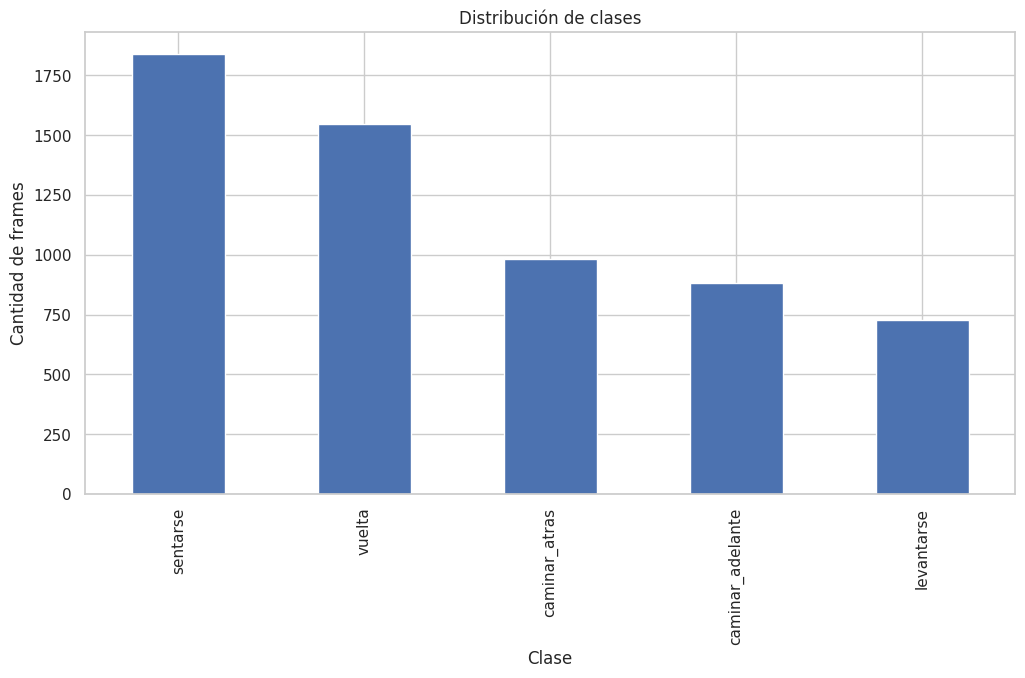

In [5]:
# Cantidad de clases
df['class_name'].value_counts().plot(kind='bar', title="Distribución de clases")
plt.xlabel("Clase")
plt.ylabel("Cantidad de frames")
plt.show()


In [7]:
# Ver columnas con posibles valores nulos
nulls = df.isnull().mean().sort_values(ascending=False)
print("Porcentaje de valores nulos por columna (top 10):")
print(nulls.head(10))


Porcentaje de valores nulos por columna (top 10):
frame    0.0
x0       0.0
y0       0.0
z0       0.0
v0       0.0
x1       0.0
y1       0.0
z1       0.0
v1       0.0
x2       0.0
dtype: float64


In [9]:
# Eliminar filas con NaN
df_clean = df.dropna()
print("Filas eliminadas por valores nulos:", len(df) - len(df_clean))

Filas eliminadas por valores nulos: 0


In [11]:
# Calcular visibilidad promedio por fila
vis_cols = [f'v{i}' for i in range(33)]
df_clean['v_mean'] = df_clean[vis_cols].mean(axis=1)

# Filtrar frames con baja visibilidad
df_clean = df_clean[df_clean['v_mean'] >= 0.3]
print("Filas eliminadas por visibilidad < 0.3:", len(df) - len(df_clean))


Filas eliminadas por visibilidad < 0.3: 0


In [ ]:
# Filtro por coordenadas fuera de [0, 1]
coord_cols = [col for col in df_clean.columns if col.startswith(('x', 'y'))]
before = len(df_clean)
df_clean = df_clean[(df_clean[coord_cols] >= 0.0).all(axis=1) & (df_clean[coord_cols] <= 1.0).all(axis=1)]
after = len(df_clean)
print(f"Filas eliminadas por coordenadas fuera de rango: {before - after}")


🧼 Filas eliminadas por coordenadas fuera de rango: 1306


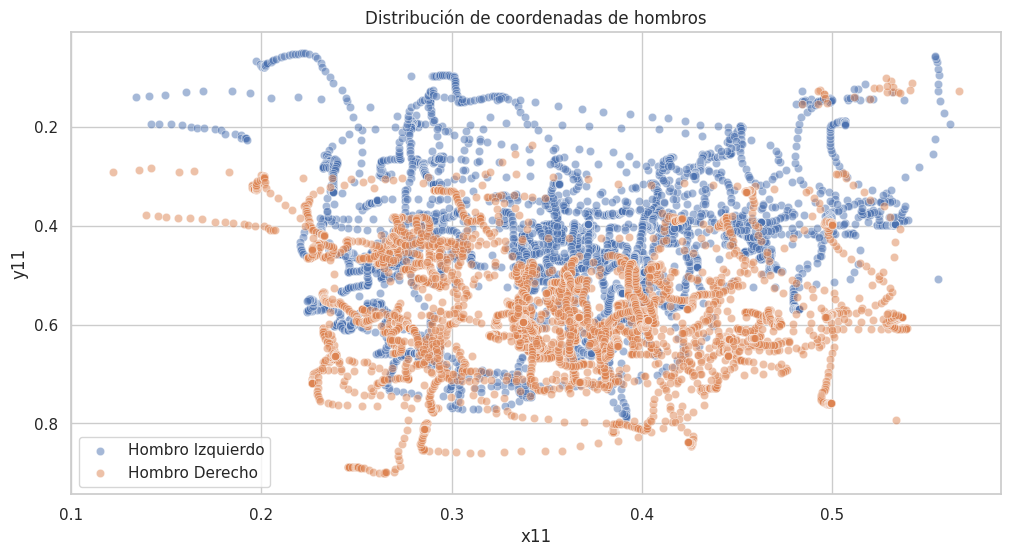

In [15]:
# Coordenadas de hombros (izquierdo = 11, derecho = 12)
sns.scatterplot(x=df_clean['x11'], y=df_clean['y11'], alpha=0.5, label='Hombro Izquierdo')
sns.scatterplot(x=df_clean['x12'], y=df_clean['y12'], alpha=0.5, label='Hombro Derecho')
plt.title("Distribución de coordenadas de hombros")
plt.gca().invert_yaxis()
plt.legend()
plt.show()


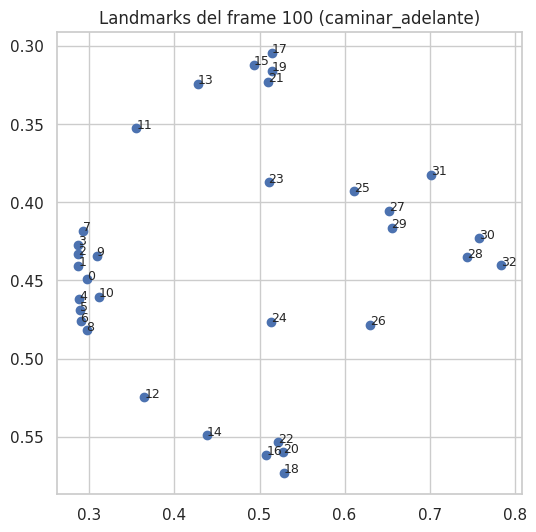

In [13]:
def plot_landmarks(df, frame_index):
    coords = []
    row = df.iloc[frame_index]
    for i in range(33):
        x, y = row[f'x{i}'], row[f'y{i}']
        coords.append((x, y))
    coords = np.array(coords)

    plt.figure(figsize=(6, 6))
    plt.scatter(coords[:, 0], coords[:, 1])
    for i, (x, y) in enumerate(coords):
        plt.text(x, y, str(i), fontsize=9)
    plt.gca().invert_yaxis()
    plt.title(f"Landmarks del frame {frame_index} ({row['class_name']})")
    plt.grid(True)
    plt.show()

# Ejemplo:
plot_landmarks(df_clean.reset_index(drop=True), frame_index=100)


In [17]:
# Guardar el dataset limpio
output_path = "./data/dataset_ready/movimientos_limpio.csv"
df_clean.to_csv(output_path, index=False)
print(f"Dataset limpio guardado en: {output_path}")

Dataset limpio guardado en: ./data/dataset_ready/movimientos_limpio.csv
